# CIFAR10

In [1]:
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import matplotlib.pyplot as plt

from src.data import CIFAR10
from src.models import CNN
from src.training.config import TrainingConfig
from src.training import ModelTrainer

In [2]:
training_config = TrainingConfig(batch_size=100, lr=0.001)

In [3]:
training_transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=10),
    transforms.RandomAffine(degrees=0, shear=10, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

validation_transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

In [4]:
training_data = CIFAR10(train=True, root='./data', transform=training_transform)
testing_data = CIFAR10(train=False, root='./data', transform=validation_transform)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
len(training_data), len(testing_data)

(50000, 10000)

In [6]:
model = CNN()

In [7]:
model

CNN(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (12): Dropout2d(p=0.05, inplace=False)
    (13): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): ReLU()
    (1

In [8]:
model_trainer = ModelTrainer(
    model,
    optim.Adam,
    nn.CrossEntropyLoss(),
    training_config,
    training_data,
    cuda=True,
    validation_data=testing_data
)

using NVIDIA GeForce GTX 1060


In [9]:
training_metrics, testing_metrics = model_trainer.train(20, True)

C:\Users\raghu\anaconda3\envs\CV\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


training metrics:   epoch: 0            loss: 1.5784082419872283      accuracy: 41.126              
testing metrics:    epoch: 0            loss: 1.3292375528812408      accuracy: 50.41               
training metrics:   epoch: 1            loss: 1.212923968911171       accuracy: 56.058              
testing metrics:    epoch: 1            loss: 1.0316443246603013      accuracy: 62.43               
training metrics:   epoch: 2            loss: 1.0380217546224595      accuracy: 63.062              
testing metrics:    epoch: 2            loss: 0.9110818833112717      accuracy: 67.71               
training metrics:   epoch: 3            loss: 0.928508181810379       accuracy: 67.266              
testing metrics:    epoch: 3            loss: 0.8383302247524261      accuracy: 70.7                
training metrics:   epoch: 4            loss: 0.8570786463022232      accuracy: 69.978              
testing metrics:    epoch: 4            loss: 0.7804780745506287      accuracy: 72.76      

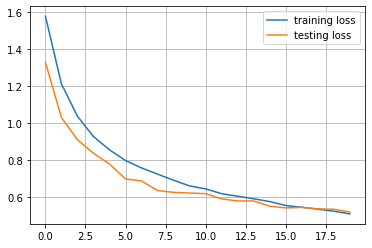

In [10]:
plt.figure(facecolor='white')
plt.plot(training_metrics.losses, label='training loss')
plt.plot(testing_metrics.losses, label='testing loss')
plt.grid()
plt.legend()

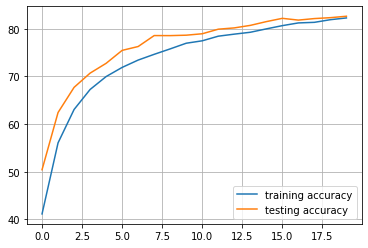

In [11]:
plt.figure(facecolor='white')
plt.plot(training_metrics.accuracies, label='training accuracy')
plt.plot(testing_metrics.accuracies, label='testing accuracy')
plt.grid()
plt.legend()